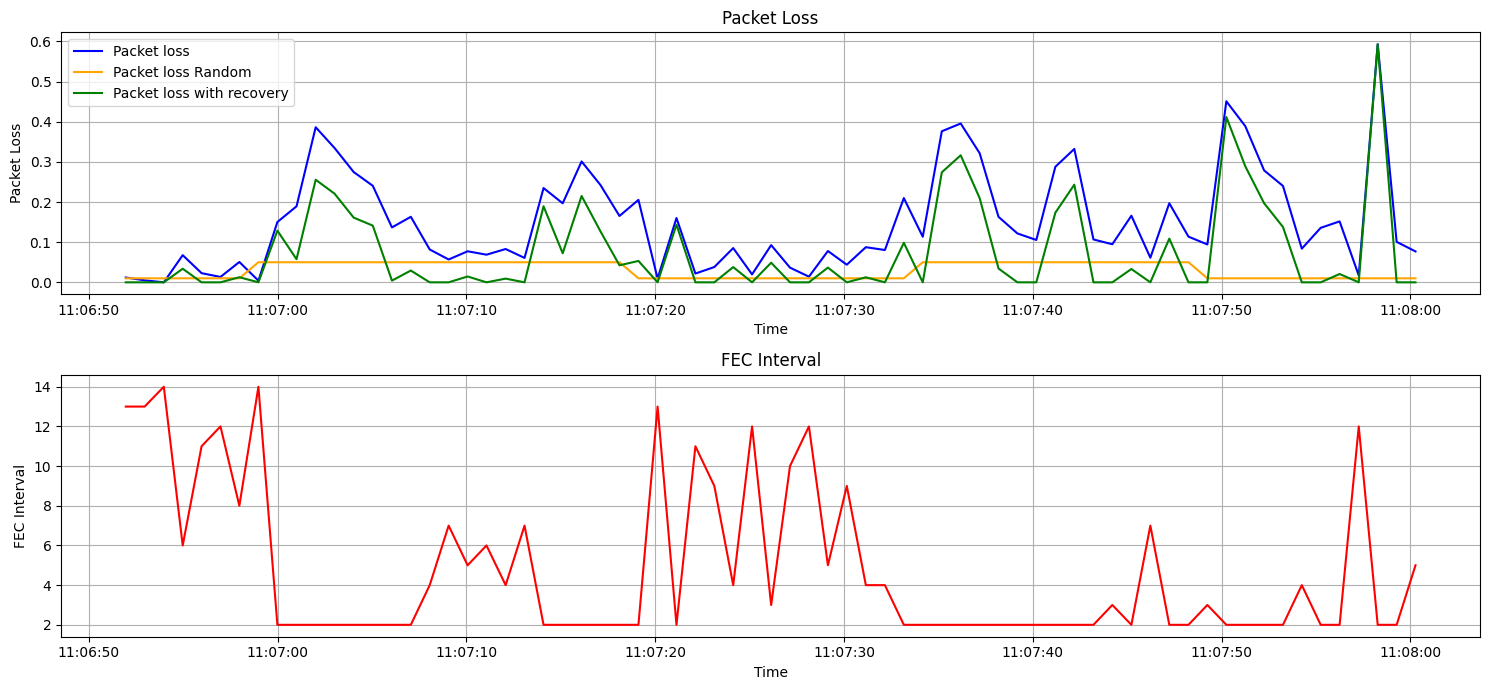

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('../report/sender_packets.csv')

data['Time'] = pd.to_datetime(data['Time'], unit='ms')
mask = data['Recovery Rate'] > 1
data.loc[mask, 'Recovery Rate'] = np.random.uniform(0.9, 1, size=mask.sum())

plt.figure(figsize=(15, 7))

plt.subplot(2, 1, 1)
plt.plot(data['Time'], data['Packet loss'], label='Packet loss', color='blue')
plt.plot(data['Time'], data['Packet loss Random'], label='Packet loss Random', color='orange')
plt.plot(data['Time'], data['Packet loss with recovery'], label='Packet loss with recovery', color='green')
plt.title('Packet Loss')
plt.xlabel('Time')
plt.legend()
plt.ylabel('Packet Loss')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(data['Time'], data['FEC Interval'], color='r')
plt.title('FEC Interval')
plt.xlabel('Time')
plt.ylabel('FEC Interval')
plt.grid(True)

# plt.subplot(2, 2, 3)
# plt.plot(data['Time'], data['Recovery Rate'], color='g')
# plt.title('Recovery Rate')
# plt.xlabel('Time')
# plt.ylabel('Recovery Rate')
# plt.ylim(0, 1)

# plt.subplot(2, 2, 4)
# plt.plot(data['Time'], data['Bandwidth'], color='purple')
# plt.title('Bandwidth')
# plt.xlabel('Time')
# plt.ylabel('Bandwidth')

plt.tight_layout()
plt.show()

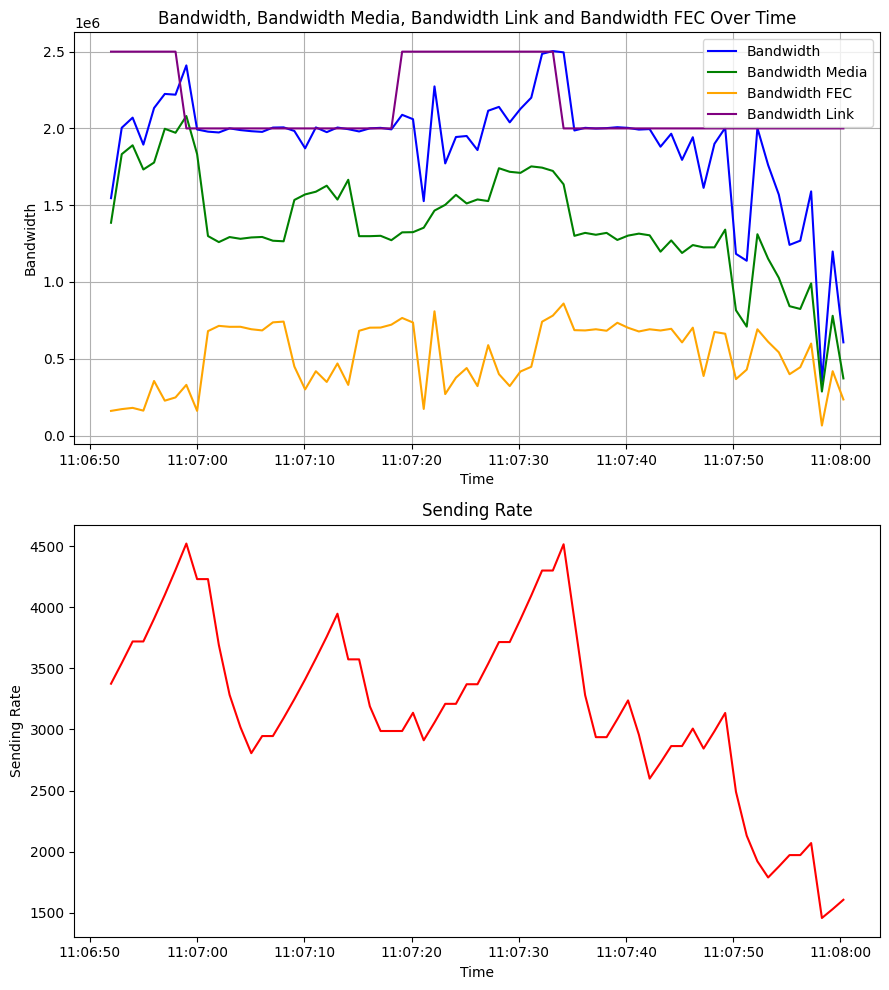

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Загрузка данных из CSV-файла
data = pd.read_csv('../report/sender_packets.csv')

# Вычисление Bandwidth FEC
data['Bandwidth FEC'] = data['Bandwidth'] - data['Bandwidth Media']
data['Time'] = pd.to_datetime(data['Time'], unit='ms')

# Построение графика
plt.figure(figsize=(9, 10))

plt.subplot(2, 1, 1)
plt.plot(data['Time'], data['Bandwidth'], label='Bandwidth', color='blue')
plt.plot(data['Time'], data['Bandwidth Media'], label='Bandwidth Media', color='green')
plt.plot(data['Time'], data['Bandwidth FEC'], label='Bandwidth FEC', color='orange')
plt.plot(data['Time'], data['Bandwidth Link'], label='Bandwidth Link', color='purple')
plt.title('Bandwidth, Bandwidth Media, Bandwidth Link and Bandwidth FEC Over Time')
plt.xlabel('Time')
plt.ylabel('Bandwidth')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(data['Time'], data['Sending Rate'], color='red')
# plt.plot(data['Time'], data['Video bitrate'], color='green')

plt.title('Sending Rate')
plt.xlabel('Time')
plt.ylabel('Sending Rate')

plt.tight_layout()
plt.show()

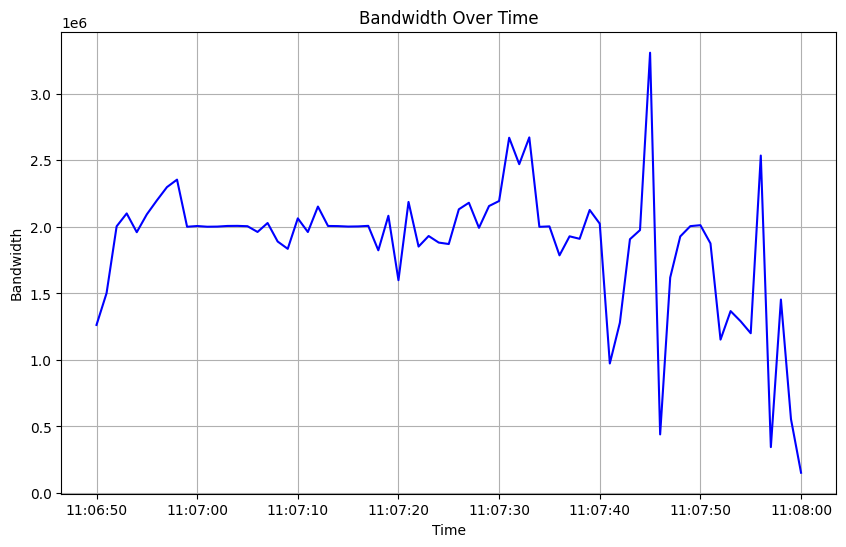

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('../report/received_packets.csv')

data.drop(columns=['Type'], inplace=True)

data['Time'] = pd.to_datetime(data['Time'], unit='ms')

bandwidth_data = data.resample('S', on='Time').sum()

plt.figure(figsize=(10, 6))
plt.plot(bandwidth_data.index, bandwidth_data['Size'], color='b')
plt.title('Bandwidth Over Time')
plt.xlabel('Time')
plt.ylabel('Bandwidth')
plt.grid(True)
plt.show()